## SSAC X AIFFEL AI Course Exploration 03  
## Camera Sticker
---
### 카메라 스티커 앱 만들기 첫 걸음
---
### 목차
---
#### 01. 카메라 스티커앱 만들기 첫 걸음
#### 02. 어떻게 만들까? 사진 준비하기
#### 03. 얼굴 검출 Face Detection
#### 04. 얼굴 랜드마크 Face Landmark
#### 05. 스티커 적용하기
#### 06. 프로젝트 : 고양이 수염 스티커 만들기
#### 07. 프로젝트 제출
---

### 루브릭 (프로젝트 평가 기준)
---
#### 01. 자기만의 카메라 앱 기능 구현을 완수하였다.
원본에 스티커 사진이 정상적으로 합성됨

#### 02. 스티커 이미지를 정확한 원본 위치에 반영하였다.
정확한 좌표 계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력됨

#### 03. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석함

---

## 프로젝트 결과물
---

#### 얼굴 각도
---

+ 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
  + 얼굴 각도, 정면, 측면, 위를 바로 본 사진, 아래를 바라 본 사진 등은 모두 스티커 적용이 되었음
  + 좀 더 정교하게 적용이 되려면, 우리가 살고 있는 공간이 3차원이듯, 스티커 또한 3차원으로 이동한 각도에 따라 스티커 또한 이동해서 적용되어야 한다고 생각함



#### 정면
---

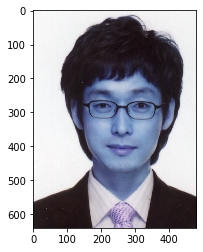

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


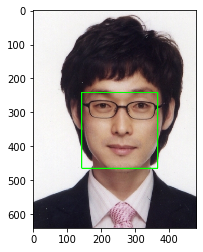

landmarks size : 68


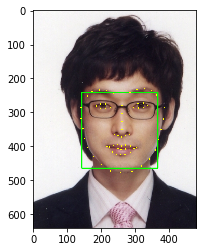

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


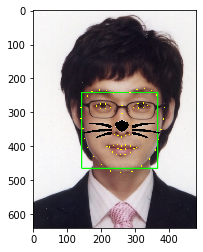

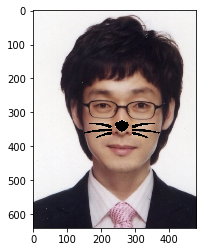

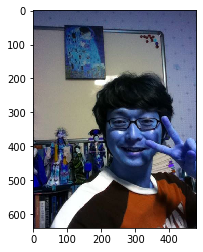

<class '_dlib_pybind11.rectangles'>
rectangles[[(201, 284) (386, 469)]]


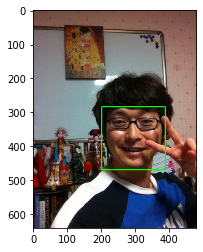

landmarks size : 68


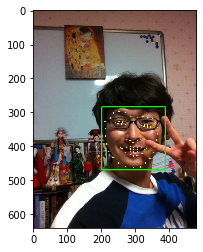

landmark[30] : (295, 372)
(x,y) : (295,372)
(w,h) : (186,186)
(295, 372)
(x,y) : (295,372)
(w,h) : (186,186)
sticker shape : (186, 186, 3)
(x,y) : (202,279)
sticker shape : (186, 186, 3)
(x,y) : (202,279)


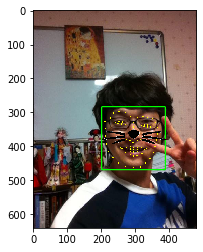

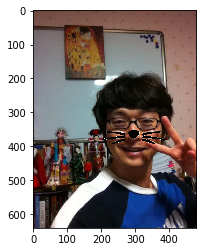

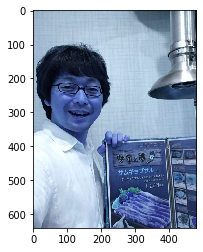

<class '_dlib_pybind11.rectangles'>
rectangles[[(64, 184) (218, 339)]]


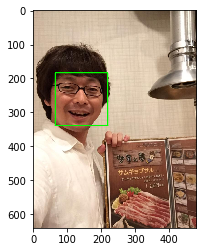

landmarks size : 68


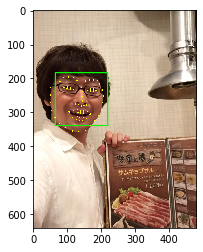

landmark[30] : (144, 266)
(x,y) : (144,266)
(w,h) : (155,155)
(144, 266)
(x,y) : (144,266)
(w,h) : (155,155)
sticker shape : (155, 155, 3)
(x,y) : (67,189)
sticker shape : (155, 155, 3)
(x,y) : (67,189)


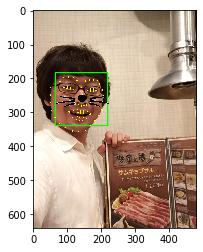

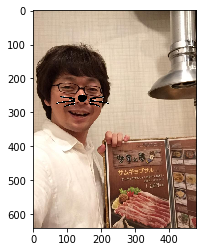

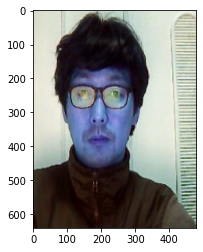

<class '_dlib_pybind11.rectangles'>
rectangles[[(92, 192) (315, 415)]]


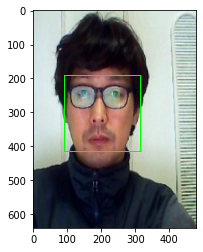

landmarks size : 68


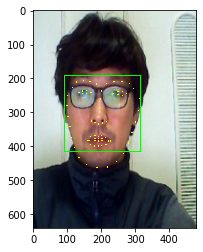

landmark[30] : (190, 311)
(x,y) : (190,311)
(w,h) : (224,224)
(190, 311)
(x,y) : (190,311)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (78,199)
sticker shape : (224, 224, 3)
(x,y) : (78,199)


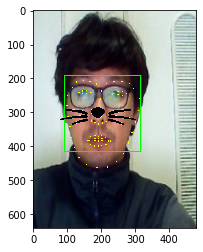

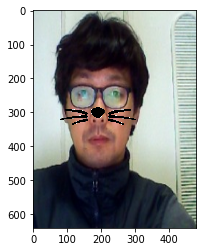

In [66]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_number = 4

i = 1
while i <= img_number:
    # 이미지 경로 지정
    my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/front-'+str(i)+'.jpg'

    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.imread(my_image_path)

    # 640x360의 크기로 Resize
    # 왜 Resize?
    img_bgr = cv2.resize(img_bgr, (480, 640))

    #- 출력용 이미지 별도 보관
    # 왜 별도 보관?
    # 원본 이미지 : img_bgr?
    # 출력용 이미지 : img_show?
    img_show = img_bgr.copy()

    # 원본 이미지 출력
    # 
    plt.imshow(img_bgr)

    # 
    plt.show()



    # 얼굴 검출 Face Detection
    # dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.
    import dlib

    # hog detector 선언
    # get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
    # 얼굴 측면 인식 등 다른 함수도 있는지?
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    # detector를 이용해 얼굴의 bounding box를 추출
    # dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
    # opencv의 BGR 이미지를 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
    #- (image, num of image pyramid)
    dlib_rects = detector_hog(img_rgb, 1)

    print(type(dlib_rects))


    # dlib_rects : bounding box
    # (270, 64), (425, 219)
    # 찾은 얼굴영역 좌표
    print(dlib_rects)   

    # 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()



    # 얼굴 랜드마크 Face Landmark
    # 저장한 Landmark 모델 불러오기
    import os

    model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

    # dlib.shape_predictor
    landmark_predictor = dlib.shape_predictor(model_path)


    # landmark_predictor : RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
    # points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
    # 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
    # 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
    # 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # landmarks size : 68
    print(f"landmarks size : {len(list_landmarks[0])}")


    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            # yellow
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()


    # 랜드마크를 영상에 출력
    # zip
    # x 코의 x 좌표값
    # y 코의 y 좌표값 - (bounding box 넓이 // 2)
    # w bounding_box 넓이
    # h bounding box 높이
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (f"landmark[30] : {landmark[30]}")

        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 사진 크기 : 640 * 360
    # bounding box 크기 : 155 = 425 - 270, 155 = 219 - 64 / (270, 64) (425, 219)

    # 스티커 적용하기
    # 눈썹 위 얼굴 중앙
    # 눈썹 위 : 
    # 얼굴 중앙 : 
    # zip
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (landmark[30])


        # 350
        x = landmark[30][0]
        # -9 = 68 - 77 (= 155//2)
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 준비해 둔 스티커 이미지 읽은 후 적용
    import os

    sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/cat-whiskers.png'

    # cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
    # cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
    # cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))


#     plt.imshow(img_sticker)
#     plt.show()



    # 스티커 크기
    # king.png : 156, 156, 3
    # cat-whiskers.png : 156, 156, 3
    print (f"sticker shape : {img_sticker.shape}")

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다.
    # 이미지 시작점은 top-left 좌표이기 때문
    # 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
    # landmark [30] : 350, 146

    # 스티커 위치
    # [36][0]
    # [36][1] + 
    # king.png 
    # left : 272 = landmark[30][0] 350 - king.png 156 // 2
    refined_x = x - w // 2
    # king.png top : -88 = landmark[30][1] - dlib_rect.width() // 2 68 - dlib_rect.width() 156
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다.
    # ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다.
    # 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거
    if refined_y < 0 :
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    print (f"sticker shape : {img_sticker.shape}")


    # -y 크기만큼 스티커를 crop top 의 y 좌표는 원본 이미지의 경계 값으로 수정
    # 272, 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # 원본 이미지에 스티커 적용 : 수정 배경 흰색 제거
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # refined_y : 
    # img_sticker.shape[0] : 
    # refined_x : 
    # img_sticker.shape[1] : 

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#     print(f"sticker area : {sticker_area}")
#     print(f"img_show : {img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]}")


    # 원본 이미지에 스티커 적용 : 원본
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


    # 스티커 기본 기능이 완성
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # refined_y :
    # img_sticker.shape[0] : 156 
    # refined_x :
    # img_sticker.shape[1] :156
    # sticker_area = 
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    # np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # 원본
    # sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    # plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

#### 각도 변화
---

급격한 변화는 아니였지만, 각도가 변하더라도 일정 범위 내에서는 스티커 적용 가능

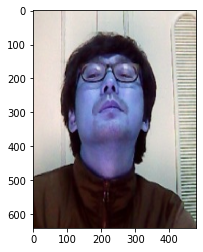

<class '_dlib_pybind11.rectangles'>
rectangles[[(117, 142) (340, 365)]]


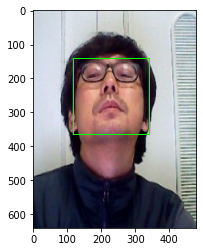

landmarks size : 68


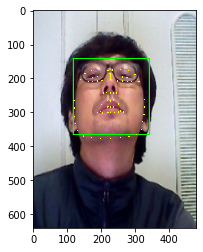

landmark[30] : (226, 203)
(x,y) : (226,203)
(w,h) : (224,224)
(226, 203)
(x,y) : (226,203)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (114,91)
sticker shape : (224, 224, 3)
(x,y) : (114,91)


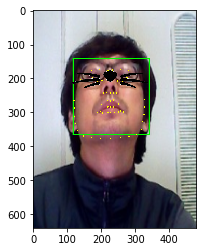

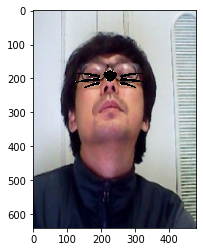

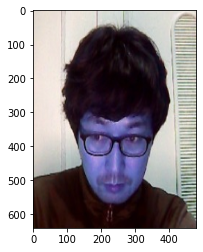

<class '_dlib_pybind11.rectangles'>
rectangles[[(111, 320) (379, 587)]]


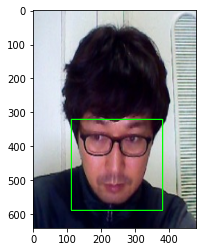

landmarks size : 68


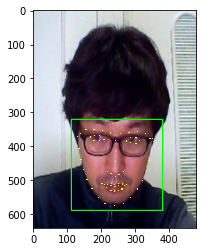

landmark[30] : (241, 474)
(x,y) : (241,474)
(w,h) : (269,269)
(241, 474)
(x,y) : (241,474)
(w,h) : (269,269)
sticker shape : (269, 269, 3)
(x,y) : (107,340)
sticker shape : (269, 269, 3)
(x,y) : (107,340)


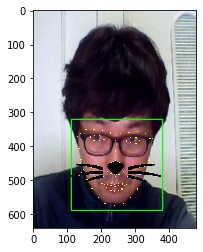

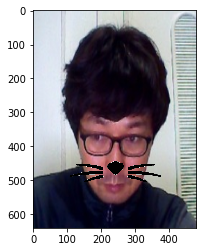

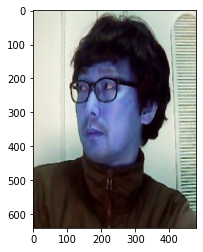

<class '_dlib_pybind11.rectangles'>
rectangles[[(68, 167) (291, 390)]]


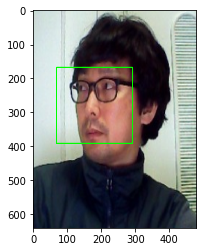

landmarks size : 68


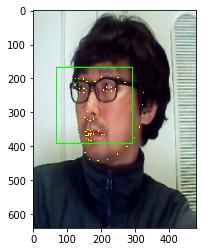

landmark[30] : (158, 298)
(x,y) : (158,298)
(w,h) : (224,224)
(158, 298)
(x,y) : (158,298)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (46,186)
sticker shape : (224, 224, 3)
(x,y) : (46,186)


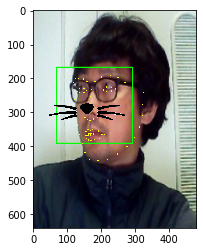

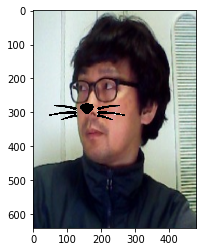

In [67]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_number = 3

i = 1
while i <= img_number:
    # 이미지 경로 지정
    my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/angle-'+str(i)+'.jpg'

    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.imread(my_image_path)

    # 640x360의 크기로 Resize
    # 왜 Resize?
    img_bgr = cv2.resize(img_bgr, (480, 640))

    #- 출력용 이미지 별도 보관
    # 왜 별도 보관?
    # 원본 이미지 : img_bgr?
    # 출력용 이미지 : img_show?
    img_show = img_bgr.copy()

    # 원본 이미지 출력
    # 
    plt.imshow(img_bgr)

    # 
    plt.show()



    # 얼굴 검출 Face Detection
    # dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.
    import dlib

    # hog detector 선언
    # get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
    # 얼굴 측면 인식 등 다른 함수도 있는지?
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    # detector를 이용해 얼굴의 bounding box를 추출
    # dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
    # opencv의 BGR 이미지를 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
    #- (image, num of image pyramid)
    dlib_rects = detector_hog(img_rgb, 1)

    print(type(dlib_rects))


    # dlib_rects : bounding box
    # (270, 64), (425, 219)
    # 찾은 얼굴영역 좌표
    print(dlib_rects)   

    # 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()



    # 얼굴 랜드마크 Face Landmark
    # 저장한 Landmark 모델 불러오기
    import os

    model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

    # dlib.shape_predictor
    landmark_predictor = dlib.shape_predictor(model_path)


    # landmark_predictor : RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
    # points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
    # 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
    # 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
    # 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # landmarks size : 68
    print(f"landmarks size : {len(list_landmarks[0])}")


    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            # yellow
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()


    # 랜드마크를 영상에 출력
    # zip
    # x 코의 x 좌표값
    # y 코의 y 좌표값 - (bounding box 넓이 // 2)
    # w bounding_box 넓이
    # h bounding box 높이
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (f"landmark[30] : {landmark[30]}")

        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 사진 크기 : 640 * 360
    # bounding box 크기 : 155 = 425 - 270, 155 = 219 - 64 / (270, 64) (425, 219)

    # 스티커 적용하기
    # 눈썹 위 얼굴 중앙
    # 눈썹 위 : 
    # 얼굴 중앙 : 
    # zip
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (landmark[30])


        # 350
        x = landmark[30][0]
        # -9 = 68 - 77 (= 155//2)
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 준비해 둔 스티커 이미지 읽은 후 적용
    import os

    sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/cat-whiskers.png'

    # cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
    # cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
    # cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))


#     plt.imshow(img_sticker)
#     plt.show()



    # 스티커 크기
    # king.png : 156, 156, 3
    # cat-whiskers.png : 156, 156, 3
    print (f"sticker shape : {img_sticker.shape}")

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다.
    # 이미지 시작점은 top-left 좌표이기 때문
    # 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
    # landmark [30] : 350, 146

    # 스티커 위치
    # [36][0]
    # [36][1] + 
    # king.png 
    # left : 272 = landmark[30][0] 350 - king.png 156 // 2
    refined_x = x - w // 2
    # king.png top : -88 = landmark[30][1] - dlib_rect.width() // 2 68 - dlib_rect.width() 156
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다.
    # ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다.
    # 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거
    if refined_y < 0 :
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    print (f"sticker shape : {img_sticker.shape}")


    # -y 크기만큼 스티커를 crop top 의 y 좌표는 원본 이미지의 경계 값으로 수정
    # 272, 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # 원본 이미지에 스티커 적용 : 수정 배경 흰색 제거
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # refined_y : 
    # img_sticker.shape[0] : 
    # refined_x : 
    # img_sticker.shape[1] : 

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#     print(f"sticker area : {sticker_area}")
#     print(f"img_show : {img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]}")


    # 원본 이미지에 스티커 적용 : 원본
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


    # 스티커 기본 기능이 완성
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # refined_y :
    # img_sticker.shape[0] : 156 
    # refined_x :
    # img_sticker.shape[1] :156
    # sticker_area = 
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    # np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # 원본
    # sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    # plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

#### 옆으로 누워서 찍은 사진
---

옆으로 누워서 찍은 사진에 대해서는 인식을 못함

In [68]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_number = 1

i = 1
while i < img_number:
    # 이미지 경로 지정
    my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/lay-'+str(i)+'.jpg'

    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.imread(my_image_path)

    # 640x360의 크기로 Resize
    # 왜 Resize?
    img_bgr = cv2.resize(img_bgr, (480, 640))

    #- 출력용 이미지 별도 보관
    # 왜 별도 보관?
    # 원본 이미지 : img_bgr?
    # 출력용 이미지 : img_show?
    img_show = img_bgr.copy()

    # 원본 이미지 출력
    # 
    plt.imshow(img_bgr)

    # 
    plt.show()



    # 얼굴 검출 Face Detection
    # dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.
    import dlib

    # hog detector 선언
    # get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
    # 얼굴 측면 인식 등 다른 함수도 있는지?
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    # detector를 이용해 얼굴의 bounding box를 추출
    # dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
    # opencv의 BGR 이미지를 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
    #- (image, num of image pyramid)
    dlib_rects = detector_hog(img_rgb, 1)

    print(type(dlib_rects))


    # dlib_rects : bounding box
    # (270, 64), (425, 219)
    # 찾은 얼굴영역 좌표
    print(dlib_rects)   

    # 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()



    # 얼굴 랜드마크 Face Landmark
    # 저장한 Landmark 모델 불러오기
    import os

    model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

    # dlib.shape_predictor
    landmark_predictor = dlib.shape_predictor(model_path)


    # landmark_predictor : RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
    # points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
    # 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
    # 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
    # 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # landmarks size : 68
    print(f"landmarks size : {len(list_landmarks[0])}")


    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            # yellow
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()


    # 랜드마크를 영상에 출력
    # zip
    # x 코의 x 좌표값
    # y 코의 y 좌표값 - (bounding box 넓이 // 2)
    # w bounding_box 넓이
    # h bounding box 높이
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (f"landmark[30] : {landmark[30]}")

        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 사진 크기 : 640 * 360
    # bounding box 크기 : 155 = 425 - 270, 155 = 219 - 64 / (270, 64) (425, 219)

    # 스티커 적용하기
    # 눈썹 위 얼굴 중앙
    # 눈썹 위 : 
    # 얼굴 중앙 : 
    # zip
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (landmark[30])


        # 350
        x = landmark[30][0]
        # -9 = 68 - 77 (= 155//2)
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 준비해 둔 스티커 이미지 읽은 후 적용
    import os

    sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/cat-whiskers.png'

    # cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
    # cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
    # cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))


#     plt.imshow(img_sticker)
#     plt.show()



    # 스티커 크기
    # king.png : 156, 156, 3
    # cat-whiskers.png : 156, 156, 3
    print (f"sticker shape : {img_sticker.shape}")

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다.
    # 이미지 시작점은 top-left 좌표이기 때문
    # 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
    # landmark [30] : 350, 146

    # 스티커 위치
    # [36][0]
    # [36][1] + 
    # king.png 
    # left : 272 = landmark[30][0] 350 - king.png 156 // 2
    refined_x = x - w // 2
    # king.png top : -88 = landmark[30][1] - dlib_rect.width() // 2 68 - dlib_rect.width() 156
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다.
    # ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다.
    # 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거
    if refined_y < 0 :
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    print (f"sticker shape : {img_sticker.shape}")


    # -y 크기만큼 스티커를 crop top 의 y 좌표는 원본 이미지의 경계 값으로 수정
    # 272, 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # 원본 이미지에 스티커 적용 : 수정 배경 흰색 제거
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # refined_y : 
    # img_sticker.shape[0] : 
    # refined_x : 
    # img_sticker.shape[1] : 

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#     print(f"sticker area : {sticker_area}")
#     print(f"img_show : {img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]}")


    # 원본 이미지에 스티커 적용 : 원본
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


    # 스티커 기본 기능이 완성
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # refined_y :
    # img_sticker.shape[0] : 156 
    # refined_x :
    # img_sticker.shape[1] :156
    # sticker_area = 
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    # np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # 원본
    # sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    # plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

#### 이미지 밝기
---

이미지 밝기에 대해서도 일정 범위 내에서는 스티커 적용 가능 (밝음 / 어둠 둘 다)

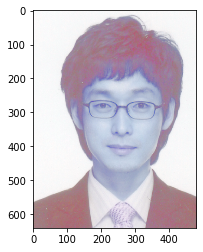

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


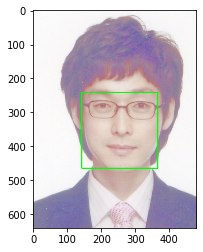

landmarks size : 68


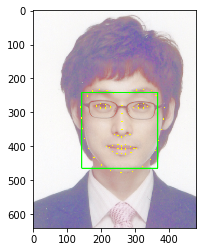

landmark[30] : (259, 350)
(x,y) : (259,350)
(w,h) : (224,224)
(259, 350)
(x,y) : (259,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (147,238)
sticker shape : (224, 224, 3)
(x,y) : (147,238)


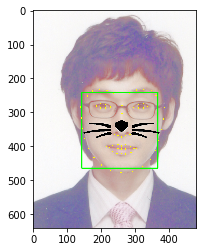

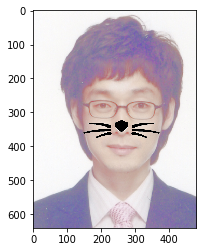

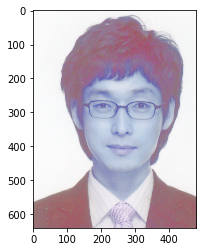

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


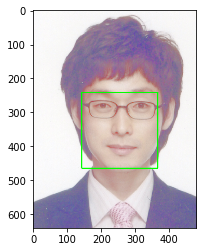

landmarks size : 68


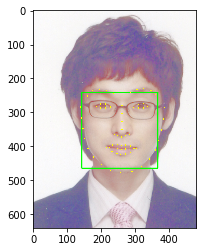

landmark[30] : (259, 350)
(x,y) : (259,350)
(w,h) : (224,224)
(259, 350)
(x,y) : (259,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (147,238)
sticker shape : (224, 224, 3)
(x,y) : (147,238)


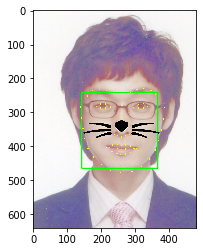

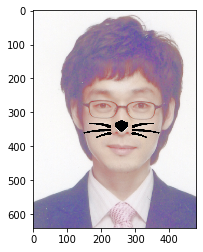

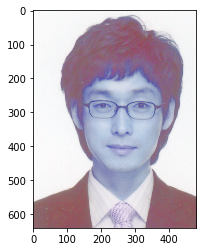

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


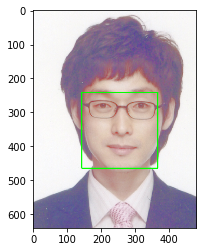

landmarks size : 68


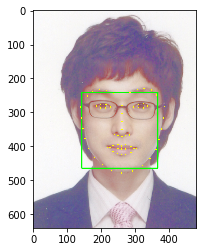

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


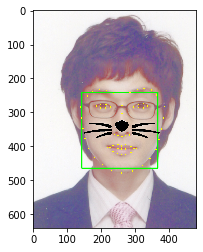

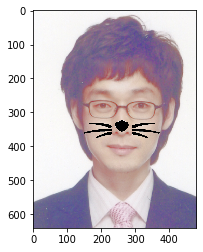

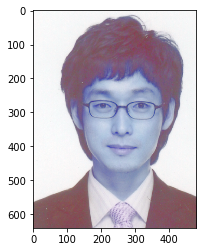

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


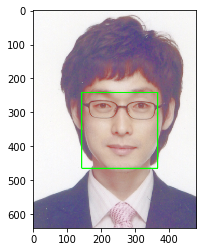

landmarks size : 68


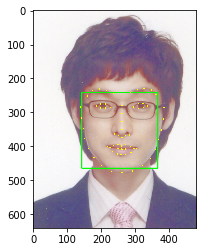

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


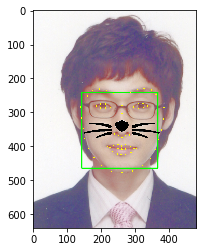

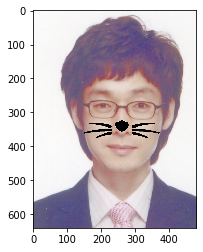

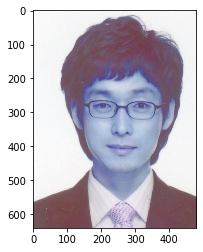

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


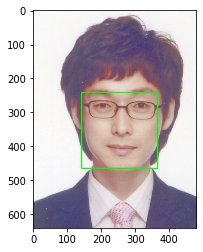

landmarks size : 68


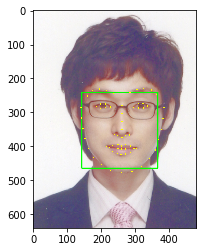

landmark[30] : (260, 351)
(x,y) : (260,351)
(w,h) : (224,224)
(260, 351)
(x,y) : (260,351)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,239)
sticker shape : (224, 224, 3)
(x,y) : (148,239)


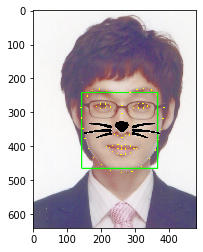

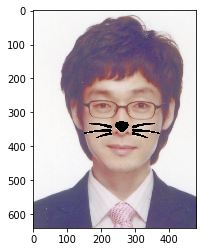

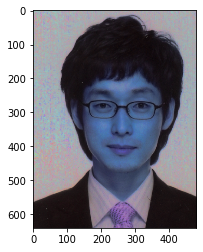

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


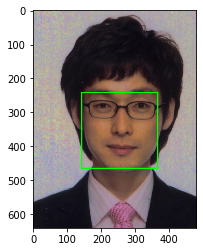

landmarks size : 68


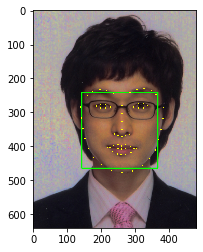

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


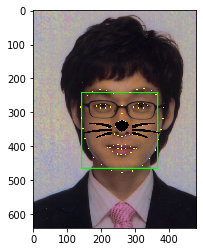

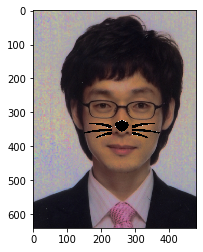

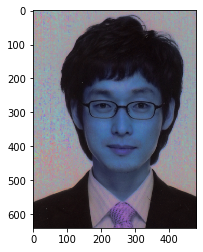

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


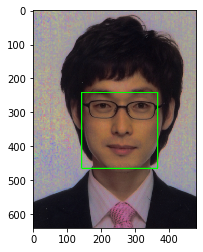

landmarks size : 68


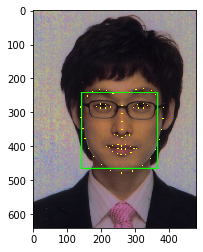

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


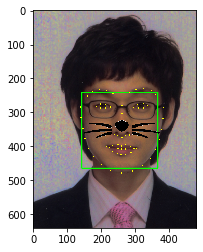

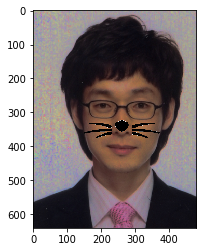

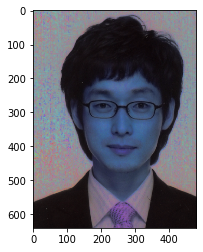

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


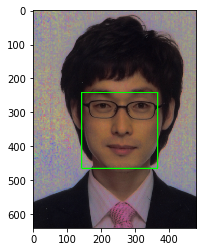

landmarks size : 68


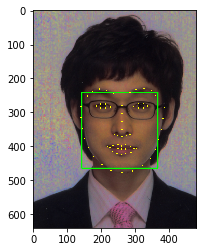

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


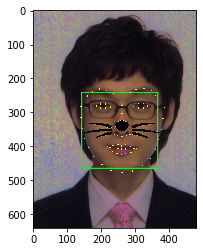

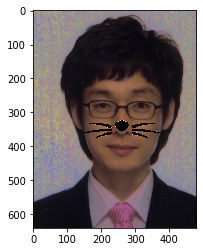

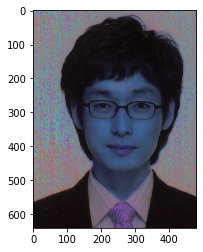

<class '_dlib_pybind11.rectangles'>
rectangles[[(142, 242) (365, 464)]]


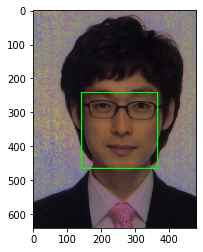

landmarks size : 68


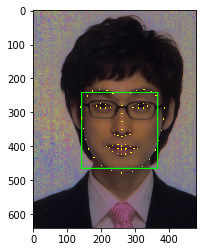

landmark[30] : (260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
(260, 350)
(x,y) : (260,350)
(w,h) : (224,224)
sticker shape : (224, 224, 3)
(x,y) : (148,238)
sticker shape : (224, 224, 3)
(x,y) : (148,238)


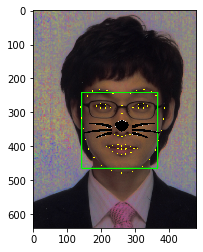

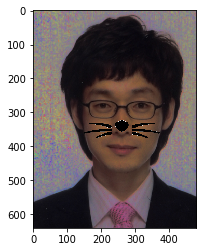

In [69]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_number = 10

i = 1
while i < img_number:
    # 이미지 경로 지정
    my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/brightness-'+str(i)+'.jpg'

    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.imread(my_image_path)

    # 640x360의 크기로 Resize
    # 왜 Resize?
    img_bgr = cv2.resize(img_bgr, (480, 640))

    #- 출력용 이미지 별도 보관
    # 왜 별도 보관?
    # 원본 이미지 : img_bgr?
    # 출력용 이미지 : img_show?
    img_show = img_bgr.copy()

    # 원본 이미지 출력
    # 
    plt.imshow(img_bgr)

    # 
    plt.show()



    # 얼굴 검출 Face Detection
    # dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.
    import dlib

    # hog detector 선언
    # get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
    # 얼굴 측면 인식 등 다른 함수도 있는지?
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    # detector를 이용해 얼굴의 bounding box를 추출
    # dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
    # opencv의 BGR 이미지를 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
    #- (image, num of image pyramid)
    dlib_rects = detector_hog(img_rgb, 1)

    print(type(dlib_rects))


    # dlib_rects : bounding box
    # (270, 64), (425, 219)
    # 찾은 얼굴영역 좌표
    print(dlib_rects)   

    # 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()



    # 얼굴 랜드마크 Face Landmark
    # 저장한 Landmark 모델 불러오기
    import os

    model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

    # dlib.shape_predictor
    landmark_predictor = dlib.shape_predictor(model_path)


    # landmark_predictor : RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
    # points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
    # 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
    # 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
    # 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # landmarks size : 68
    print(f"landmarks size : {len(list_landmarks[0])}")


    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            # yellow
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()


    # 랜드마크를 영상에 출력
    # zip
    # x 코의 x 좌표값
    # y 코의 y 좌표값 - (bounding box 넓이 // 2)
    # w bounding_box 넓이
    # h bounding box 높이
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (f"landmark[30] : {landmark[30]}")

        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 사진 크기 : 640 * 360
    # bounding box 크기 : 155 = 425 - 270, 155 = 219 - 64 / (270, 64) (425, 219)

    # 스티커 적용하기
    # 눈썹 위 얼굴 중앙
    # 눈썹 위 : 
    # 얼굴 중앙 : 
    # zip
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (landmark[30])


        # 350
        x = landmark[30][0]
        # -9 = 68 - 77 (= 155//2)
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 준비해 둔 스티커 이미지 읽은 후 적용
    import os

    sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/cat-whiskers.png'

    # cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
    # cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
    # cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))


#     plt.imshow(img_sticker)
#     plt.show()



    # 스티커 크기
    # king.png : 156, 156, 3
    # cat-whiskers.png : 156, 156, 3
    print (f"sticker shape : {img_sticker.shape}")

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다.
    # 이미지 시작점은 top-left 좌표이기 때문
    # 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
    # landmark [30] : 350, 146

    # 스티커 위치
    # [36][0]
    # [36][1] + 
    # king.png 
    # left : 272 = landmark[30][0] 350 - king.png 156 // 2
    refined_x = x - w // 2
    # king.png top : -88 = landmark[30][1] - dlib_rect.width() // 2 68 - dlib_rect.width() 156
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다.
    # ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다.
    # 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거
    if refined_y < 0 :
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    print (f"sticker shape : {img_sticker.shape}")


    # -y 크기만큼 스티커를 crop top 의 y 좌표는 원본 이미지의 경계 값으로 수정
    # 272, 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # 원본 이미지에 스티커 적용 : 수정 배경 흰색 제거
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # refined_y : 
    # img_sticker.shape[0] : 
    # refined_x : 
    # img_sticker.shape[1] : 

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#     print(f"sticker area : {sticker_area}")
#     print(f"img_show : {img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]}")


    # 원본 이미지에 스티커 적용 : 원본
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


    # 스티커 기본 기능이 완성
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # refined_y :
    # img_sticker.shape[0] : 156 
    # refined_x :
    # img_sticker.shape[1] :156
    # sticker_area = 
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    # np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # 원본
    # sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    # plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

#### 촬영 거리
---
+ 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
  + 멀리서라는 게 어느 정도인지는 모르겠지만, 어느 정도 거리까지는 인식하였음
  + 다만, 옆으로 누워서 촬영하는 경우에는 Face Detection 부분에서 에러가 났음

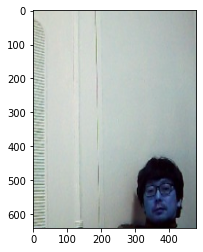

<class '_dlib_pybind11.rectangles'>
rectangles[[(306, 498) (414, 605)]]


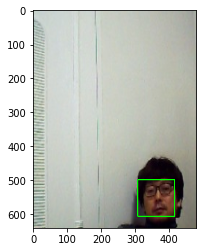

landmarks size : 68


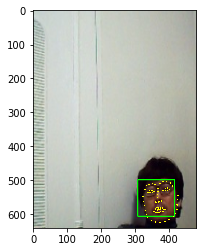

landmark[30] : (365, 549)
(x,y) : (365,549)
(w,h) : (109,109)
(365, 549)
(x,y) : (365,549)
(w,h) : (109,109)
sticker shape : (109, 109, 3)
(x,y) : (311,495)
sticker shape : (109, 109, 3)
(x,y) : (311,495)


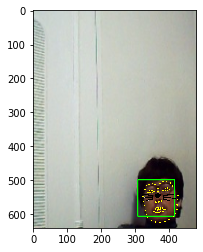

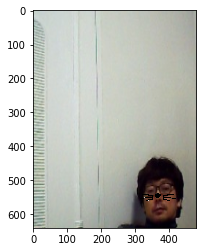

In [70]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_number = 1

i = 1
while i <= img_number:
    # 이미지 경로 지정
    my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/distance-'+str(i)+'.jpg'

    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.imread(my_image_path)

    # 640x360의 크기로 Resize
    # 왜 Resize?
    img_bgr = cv2.resize(img_bgr, (480, 640))

    #- 출력용 이미지 별도 보관
    # 왜 별도 보관?
    # 원본 이미지 : img_bgr?
    # 출력용 이미지 : img_show?
    img_show = img_bgr.copy()

    # 원본 이미지 출력
    # 
    plt.imshow(img_bgr)

    # 
    plt.show()



    # 얼굴 검출 Face Detection
    # dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.
    import dlib

    # hog detector 선언
    # get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
    # 얼굴 측면 인식 등 다른 함수도 있는지?
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    # detector를 이용해 얼굴의 bounding box를 추출
    # dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
    # opencv의 BGR 이미지를 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
    #- (image, num of image pyramid)
    dlib_rects = detector_hog(img_rgb, 1)

    print(type(dlib_rects))


    # dlib_rects : bounding box
    # (270, 64), (425, 219)
    # 찾은 얼굴영역 좌표
    print(dlib_rects)   

    # 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()



    # 얼굴 랜드마크 Face Landmark
    # 저장한 Landmark 모델 불러오기
    import os

    model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

    # dlib.shape_predictor
    landmark_predictor = dlib.shape_predictor(model_path)


    # landmark_predictor : RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
    # points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
    # 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
    # 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
    # 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # landmarks size : 68
    print(f"landmarks size : {len(list_landmarks[0])}")


    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            # yellow
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    plt.imshow(img_show_rgb)
    plt.show()


    # 랜드마크를 영상에 출력
    # zip
    # x 코의 x 좌표값
    # y 코의 y 좌표값 - (bounding box 넓이 // 2)
    # w bounding_box 넓이
    # h bounding box 높이
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (f"landmark[30] : {landmark[30]}")

        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 사진 크기 : 640 * 360
    # bounding box 크기 : 155 = 425 - 270, 155 = 219 - 64 / (270, 64) (425, 219)

    # 스티커 적용하기
    # 눈썹 위 얼굴 중앙
    # 눈썹 위 : 
    # 얼굴 중앙 : 
    # zip
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # nose center index : 30
        print (landmark[30])


        # 350
        x = landmark[30][0]
        # -9 = 68 - 77 (= 155//2)
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))


    # 준비해 둔 스티커 이미지 읽은 후 적용
    import os

    sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/cat-whiskers.png'

    # cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
    # cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
    # cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))


#     plt.imshow(img_sticker)
#     plt.show()



    # 스티커 크기
    # king.png : 156, 156, 3
    # cat-whiskers.png : 156, 156, 3
    print (f"sticker shape : {img_sticker.shape}")

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다.
    # 이미지 시작점은 top-left 좌표이기 때문
    # 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
    # landmark [30] : 350, 146

    # 스티커 위치
    # [36][0]
    # [36][1] + 
    # king.png 
    # left : 272 = landmark[30][0] 350 - king.png 156 // 2
    refined_x = x - w // 2
    # king.png top : -88 = landmark[30][1] - dlib_rect.width() // 2 68 - dlib_rect.width() 156
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다.
    # ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다.
    # 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거
    if refined_y < 0 :
        img_sticker = img_sticker[-refined_y:]
        refined_y = 0

    print (f"sticker shape : {img_sticker.shape}")


    # -y 크기만큼 스티커를 crop top 의 y 좌표는 원본 이미지의 경계 값으로 수정
    # 272, 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


    # 원본 이미지에 스티커 적용 : 수정 배경 흰색 제거
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # refined_y : 
    # img_sticker.shape[0] : 
    # refined_x : 
    # img_sticker.shape[1] : 

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#     print(f"sticker area : {sticker_area}")
#     print(f"img_show : {img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]}")


    # 원본 이미지에 스티커 적용 : 원본
    # sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


    # 스티커 기본 기능이 완성
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # refined_y :
    # img_sticker.shape[0] : 156 
    # refined_x :
    # img_sticker.shape[1] :156
    # sticker_area = 
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    # np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()


    # bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다.
    # img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것
    # 원본
    # sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    # img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    #     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    # plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

#### 기타
---
+ 실행 속도가 중요할까요?
  + 사용자 관점에서는 실행 속도가 매우 중요합니다.
+ 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
  + 정확도 또한 중요합니다. 왜냐하면 스터커를 코가 아닌 다른 곳에 적용되었을 경우, 그것은 사용자가 스티커가 적용되길 원하는 위치가 아니기 때문입니다.

### 스티커 적용하기
---

랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우면 될 것 같습니다. 구현 방법은 여러 가지가 있습니다. 위 그림처럼 코 중심을 기준으로 높이 x 이상에 그려도 되고 눈썹 위 n 픽셀 위에 스티커를 구현해도 됩니다.

중요한 것은 얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산을 해줘야 합니다. 계산할 수치는 두 가지 입니다.

스티커 위치

스티커 크기

좌표를 먼저 확인해 보겠습니다.

### STEP 01. 스티커 구하기 / 만들기
---

스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

온라인 집사의 삶..

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

고양이 수염 이미지
(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

### STEP 02. 얼굴 검출 & 랜드마크 검출하기
---

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

### STEP 03. 스티커 적용 위치 확인하기
---

고양이 수염이 적용 될 볼 위치를 landmark를 사용해서 계산해 주세요.

볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?

2, 36, 48, 30 번 인덱스를 이용

### STEP 04. 스티커 적용하기
---

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.

opencv 의 cv2.addWeighted() 를 참고

### STEP 05. 문제점 찾아보기
---

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

+ 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
+ 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
+ 실행 속도가 중요할까요?
+ 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

## 학습 로그
---

### 얼굴 영상 > 얼굴 & 랜드마크 검출 > 스티커 추가
01. 사진 준비
02. 얼굴 검출 Face Detection
03. 얼굴 랜드마크 Face Landmark
  + 얼굴 Bouding Box
04. 스티커 적용
---

+ 스티커를 세밀하고 자연스럽게 적용하기 위해서 눈, 코, 입, 귀와 같은 얼굴 각각의 위치를 아는 것이 중요
+ 이 위치들을 찾아내는 기술을 랜드마크 landmark 또는 조정 alignment 이라고 함
+ 조금 더 큰 범위로는 keypoint detection 이라고 부르고 있음
+ 대부분의 face landmark 데이터셋은 눈, 코, 입과 턱을 포함하고 있음
+ 얼굴의 랜드마크를 찾아냈다면 머리의 위치를 예상하는 것은 쉬우며, 눈과 코의 위치로부터 위로 떨어져 있는 정도를 데이터로부터 유추할 수 있음  


+ Q. 

---

+ 모델 : Sequential API를 이용할 예정
+ tf.keras : TensorFlow의 표준 API
+ matplotlib : 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공
+ TensorFlow : 구글(Google)에서 오픈소스로 제공하고 있으며, 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나
+ 대부분의 딥러닝 구현실습은 TensorFlow Version 2.0 또는 그 이상 버전에서 진행

---
Keywords : Face Detection, Face Landmark, Bounding Box, Alignment, Keypoint Detection, Opencv

### 01. 사진 준비  
---

#### 작업 디렉토리 구조 세팅
---

+ camera_sticker/models : 적용할 모델 저장
+ camera_sticker/images : 사진, 스티커 등 이미지 저장


#### 이미지 처리 관련 패키지 설치

```
pip install opencv-python
pip install cmake
pip install dlib
```

In [1]:
!pip install opencv-python
!pip install cmake
!pip install dlib

In [2]:
!pip list | grep 'opencv-python'

opencv-python                      4.5.1.48


In [3]:
!pip list | grep 'cmake'

cmake                              3.18.4.post1


In [4]:
!pip list | grep 'dlib'

dlib                               19.21.1


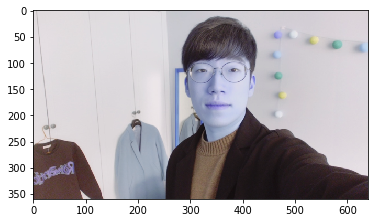

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 경로 지정
my_image_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/image.png'

#- OpenCV로 이미지를 읽어서
img_bgr = cv2.imread(my_image_path)

# 640x360의 크기로 Resize
# 왜 Resize?
img_bgr = cv2.resize(img_bgr, (640, 360))

#- 출력용 이미지 별도 보관
# 왜 별도 보관?
# 원본 이미지 : img_bgr?
# 출력용 이미지 : img_show?
img_show = img_bgr.copy()

# 원본 이미지 출력
# 
plt.imshow(img_bgr)

# 
plt.show()

(이미지 읽기 FLAG는 cv2.imread 함수의 인자값)

cv2.imread('img.png', 0) 에서 0은 이미지 읽기의 flag로, 총 3가지 종류가 있습니다.

+ cv2.IMREAD_COLOR (숫자 0) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
+ cv2.IMREAD_GRAYSCALE (숫자 1) : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
+ cv2.IMREAD_UNCHANGED (숫자 -1) : 이미지파일을 Alpha Channel까지 포함하여 읽어 들입니다.

편의를 위해 이미지 크기를 변경합니다. 위에서는 640x360의 VGA 크기(16:9)로 고정했습니다. 이미지 가로 세로의 비율에 따라 알맞게 변경해주세요. 만약 종횡비(가로 세로 비율) 가 4:3이라면 640x480 으로 변경해주시면 됩니다.

그런데 좀 이상하지 않으신가요? 사진이 잘 나온것 같긴 한데 색상이 좀 이상합니다. 얼굴 색에 왜이렇게 푸른빛이 감도는 걸까요?
이것은 opencv의 특징 때문입니다. 오늘 사용하게 될 matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것입니다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 아래와 같은 색깔 보정처리를 해주게 됩니다.

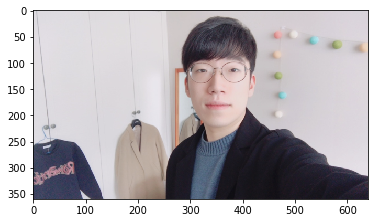

In [2]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

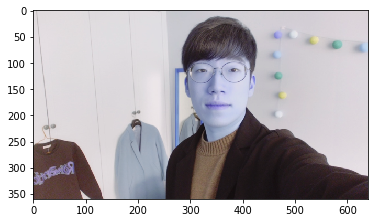

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.IMREAD_COLOR)

plt.imshow(img_rgb)
plt.show()

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.IMREAD_UNCHANGED)

plt.imshow(img_rgb)
plt.show()

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:355: error: (-206:Bad flag (parameter or structure field)) Unknown/unsupported color conversion code in function 'cvtColor'


+ FLAG는 cvtColor 함수가 아닌 imread 함수의 인자값으로 사용되는 거라 Bad Flag 에러, cv2.IMREAD_UNCHANGED  

+ 그런데, 아래 FLAG들은 cvtColor에서도 가능
```
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.IMREAD_COLOR)
```  

+ cvtColor와 imread의 인자값 확인 필요

In [6]:
import cv2

tmp_img = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)

cv2.imshow('UNCHANGED', tmp_img)

opencv는 아주 강력하고 방대한 기능을 갖춘 컴퓨터 비전 라이브러리입니다. 영상 관련 업계 표준 라이브러리의 지위를 가지고 있다고 할 수 있겠습니다. 아래 링크의 페이지를 방문해 봅시다. 어쩌면 앞으로도 자주 찾게 될지 모르겠군요. 한번 훑어본 후 아래 질문에 답변해 봅시다.

### 얼굴 검출 Face Detection
---

Object detection 기술을 이용해서 얼굴의 위치를 찾겠습니다. 이번 시간에는 빠르게 만들기 위해 학습 없이 공개되어 있는 패키지를 사용하겠습니다.

dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.

In [5]:
import dlib

# hog detector 선언
# get_frontal_face_detector는 얼굴 정면 인식하는 함수인 듯...
# 얼굴 측면 인식 등 다른 함수도 있는지?
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

# detector를 이용해 얼굴의 bounding box를 추출
# dlib은 RGB 이미지를 입력으로 받기 때문에 cvtColor 함수를 이용해 opencv의 BGR 이미지를 RGB 이미지로 변환
# opencv의 BGR 이미지를 RGB로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detector는 입력된 이미지와 이미지 피라미드 수를 통해 찾은 얼굴영역 좌표를 반환
#- (image, num of image pyramid)
dlib_rects = detector_hog(img_rgb, 1)

print(type(dlib_rects))

<class '_dlib_pybind11.rectangles'>


Q. dlib.get_frontal_face_detectore() 함수는 정면에서 나온 얼굴을 인식하는 함수인 거 같은데... 다른 함수들은 어떤 함수들이 있는지?  
Q. Image Pyramid란? 이미지를 upsampling 방법을 통해 크기를 키우는 것, 그렇다면, upsampling 방법이란? 크기를 키우는 것은 어떤 의미가 있는지? 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능, 어떻게 작게 촬영된 얼굴을 크게 볼 수 있게 하는 건지? (작게 촬영된 얼굴을 크게 하면 더 정확한 검출은 가능할 거 같음, 하지만 정확히 왜 어떻게 정확한 검출이 가능한지 고민해 볼 필요가 있을 거 같음)

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다.

detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. 이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다.

이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다. 이미지 피라미드에 대한 내용은 아래 링크를 참고해 주세요.

rectangles[[(270, 64) (425, 219)]]


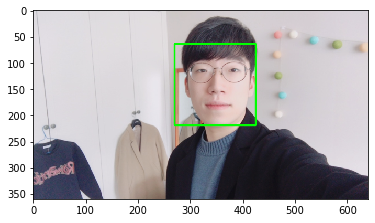

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

# 찾은 얼굴영역 좌표에 대해 각각 left, top, right, bottom 값들을 추출
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다.

dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다.

### 얼굴 랜드마크 Face Landmark
---

앞서 말씀 드린 것처럼 스티커를 섬세하게 적용하기 위해서는 이목구비의 위치를 아는 것이 중요합니다. 이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 합니다. face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용합니다.

Object keypoint estimation 알고리즘

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

이번 예제에서는 1번 방식을 다룹니다.

In [7]:
!pwd

/home/ssac30/workplace/e-03-sticker


#### dlib Landmark Localization
---

잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.


![dlib에 사용되는 랜드마크 순서](E-8-8.png)


이 때 점의 개수는 데이터셋과 논문마다 다릅니다. 예를 들면, AFLW 데이터셋은 21개를 사용하고 ibug 300w 데이터셋은 68개를 사용합니다.

![Landmark 데이터셋 요약](E-8-9.png)


Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공합니다. 학습 알고리즘은 regression tree의 앙상블 모델을 사용 했습니다. 자세한 내용이 궁금하신 분들은 2014년 CVPR (Computer Vision and Pattern Recognition) 에 발표한 논문One Millisecond Face Alignment with an Ensemble of Regression Trees 을 참고

Dlib의 제공되는 모델을 사용해보겠습니다. 먼저 공개되어 있는 weight file을 다운로드 받습니다. 위치는 root 디렉토리의 models 디렉토리 입니다. 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용

```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

저장한 Landmark 모델 불러오기

In [9]:
import os

model_path = os.getenv('HOME')+'/workplace/e-03-sticker/models/shape_predictor_68_face_landmarks.dat'

# dlib.shape_predictor
landmark_predictor = dlib.shape_predictor(model_path)

landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

In [10]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장

#### 랜드마크를 영상에 출력
---

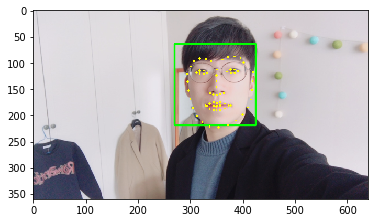

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # yellow
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

### 스티커 적용하기
---

랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우면 될 것 같습니다. 구현 방법은 여러 가지가 있습니다. 위 그림처럼 코 중심을 기준으로 높이 x 이상에 그려도 되고 눈썹 위 n 픽셀 위에 스티커를 구현해도 됩니다.

중요한 것은 얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산을 해줘야 합니다. 계산할 수치는 두 가지 입니다.

스티커 위치

스티커 크기

좌표를 먼저 확인해 보겠습니다.

In [12]:
# zip
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # nose center index : 30
    print (landmark[30])

    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 146)
(x,y) : (350,68)
(w,h) : (156,156)


### 준비해 둔 스티커 이미지 읽은 후 적용
---

In [13]:
import os

sticker_path = os.getenv('HOME')+'/workplace/e-03-sticker/images/king.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(156, 156, 3)


#### 왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize
---

원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문

In [14]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,-88)


출력해보면 문제가 생기는 것을 확인할 수 있습니다. y축 좌표의 값이 음수가 계산 

opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다. ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다. 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거

In [15]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(68, 156, 3)


-y 크기만큼 스티커를 crop
top 의 y 좌표는 원본 이미지의 경계 값으로 수정

In [16]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,0)


### 원본 이미지에 스티커 적용
---


In [17]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다. 예제에서는 (566,0) 부터 (566+268, 0+157) 범위의 이미지를 의미합니다.

스티커 이미지에서 사용할 부분은 0 이 아닌 색이 있는 부분을 사용합니다. 따라서 np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 사용하고 0이 아닌 부분을 img_sticker를 사용하시면 됩니다. img_show 에 다시 적용

#### 결과 이미지 출력
---

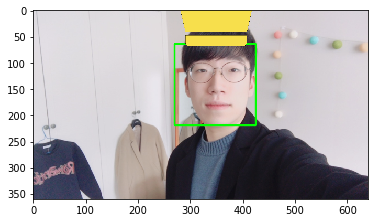

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

스티커 기본 기능이 완성

bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것

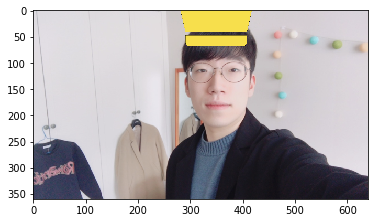

In [19]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 회고
---
+ 프로젝트에서 어려웠던 점
+ 프로젝트를 진행하면서 알아낸 점, 아직 모호한 점
+ 루브릭 평가 지표를 맞추기 위해 시도한 것들
+ 만약에 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정
+ 자기 다짐
---

#### 프로젝트에서 어려웠던 점
---

+ 좌표값 계산이 헷갈렸음

#### 프로젝트를 진행하면서 알아낸 점, 아직 모호한 점
---

+ 좌표값 계산, 하지만 확신은 안 들었음... 더 공부해야 할 듯...

#### 루브릭 평가 지표를 맞추기 위해 시도한 것들
---

+ 얼굴각도, 이미지 밝기, 촬영거리 등 변수에 따른 영향도를 체계적까지는 아니지만, 적용가능여부까지는 시도하려고 했었음

#### 만약에 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정
---

#### 자기 다짐
---

+ 체계적인 분석을 위해서는 numpy, matplotlib 등을 통해 분석, 시각화까지 이루면 더 좋을 거 같음
+ 아직도 tensorflow, numpy 등의 머신러닝, 딥러닝, 기타 모듈 그리고, 파이썬 프로그래밍이 익숙하지 않지만, 끝까지 최선을 다해 보자는 생각과 다짐